<a href="https://colab.research.google.com/github/imranasalisu1/AI_And_Drug_Discovery_Course_2026/blob/main/QSAR_Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 3 Part 1: Exploratory Data Analysis**

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

**Import Bioactivity Dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bioactivity_preprocessed_data.csv to bioactivity_preprocessed_data.csv


In [4]:
df4 = pd.read_csv("bioactivity_preprocessed_data.csv")
df4.head(10)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,27000.0,inactive
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,66000.0,inactive
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,90000.0,inactive
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,85000.0,inactive
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,92000.0,inactive
5,CHEMBL179114,COc1ccc(C(O)CNC2(c3ccccc3)c3ccccc3C(=O)N2Cc2cc...,70000.0,inactive
6,CHEMBL360719,O=C1c2ccccc2C(OCCCO)(c2ccc(Cl)cc2)N1Cc1ccccc1,15900.0,inactive
7,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,92000.0,inactive
8,CHEMBL360141,CC(=O)NCCN1C(=O)c2ccccc2C1(OCc1ccc(C(C)(C)C)cc...,14000.0,inactive
9,CHEMBL361115,O=C1c2ccccc2C(OCCc2ccccn2)(c2ccc(Cl)cc2)N1Cc1c...,26200.0,inactive


**Remove NA Values**

In [5]:
print("Original shape:", df4.shape)

df4 = df4.dropna(subset=[
    "molecule_chembl_id",
    "canonical_smiles",
    "standard_value"
])

# convert IC50 to numeric
df4["standard_value"] = pd.to_numeric(df4["standard_value"], errors="coerce")

df4 = df4.dropna(subset=["standard_value"])

df4 = df4[df4["bioactivity_class"] != 'intermediate']

print("After cleaning:", df4.shape)

Original shape: (1819, 4)
After cleaning: (1630, 4)


In [6]:
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,27000.0,inactive
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,66000.0,inactive
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,90000.0,inactive
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,85000.0,inactive
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,92000.0,inactive


**Aggregate Duplicates IC50 (median IC50 per canonical smile)**

In [7]:
df_clean = (
    df4
    .groupby("canonical_smiles", as_index=False)
    .agg({
        "molecule_chembl_id": "first",
        "standard_value": "median",
        "bioactivity_class": "first"
    })
)

print("Before aggregation:", df4.shape[0])
print("After aggregation:", df_clean.shape[0])

df_clean.head()

Before aggregation: 1630
After aggregation: 1352


,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class
0,Brc1ccc([C@@H]2Oc3ccccc3C3=C2[C@@H](c2ccc(Br)c...,CHEMBL565706,100000.0,inactive
1,Brc1ccc([C@@H]2Oc3ccccc3C3=C2[C@H](c2ccc(Br)cc...,CHEMBL584088,100000.0,inactive
2,Brc1ccc([C@H]2Oc3ccccc3C3=C2[C@@H](c2ccc(Br)cc...,CHEMBL583427,100000.0,inactive
3,C#CCN1C(=O)CN(/N=C/c2ccc([N+](=O)[O-])o2)C1=O,CHEMBL5402001,590.0,active
4,C#Cc1ccc(CN2C(=O)c3cc(C(C)(C)O)cc(F)c3C2(OCC2(...,CHEMBL5846608,7.8,active


In [8]:
df_clean.standard_value.describe()

,standard_value
count,1.352000e+03
mean,2.654226e+04
std,9.330929e+04
min,1.300000e-02
25%,1.672750e+00
50%,2.377500e+01
75%,4.155000e+02
max,1.018000e+06


**Convert IC50 to pIC50**

Convert IC50 to the negative logarithmic scale which is essentially -log10(IC50). This conversion allows IC50 data to be more uniformly distributed.

In [9]:
df_clean["pIC50"] = -np.log10(df_clean["standard_value"] * 1e-9)

df_clean.head()

,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class,pIC50
0,Brc1ccc([C@@H]2Oc3ccccc3C3=C2[C@@H](c2ccc(Br)c...,CHEMBL565706,100000.0,inactive,4.000000
1,Brc1ccc([C@@H]2Oc3ccccc3C3=C2[C@H](c2ccc(Br)cc...,CHEMBL584088,100000.0,inactive,4.000000
2,Brc1ccc([C@H]2Oc3ccccc3C3=C2[C@@H](c2ccc(Br)cc...,CHEMBL583427,100000.0,inactive,4.000000
3,C#CCN1C(=O)CN(/N=C/c2ccc([N+](=O)[O-])o2)C1=O,CHEMBL5402001,590.0,active,6.229148
4,C#Cc1ccc(CN2C(=O)c3cc(C(C)(C)O)cc(F)c3C2(OCC2(...,CHEMBL5846608,7.8,active,8.107905


**Reassign Activity Labels Based on PIC50**

Based on pIC50

Active >= 6

Inactive < 6

In [10]:
threshold = 6

df_clean["bioactivity_class"] = np.where(
    df_clean["pIC50"] >= threshold,
    "active",
    "inactive"
)

df_clean.head()

,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class,pIC50
0,Brc1ccc([C@@H]2Oc3ccccc3C3=C2[C@@H](c2ccc(Br)c...,CHEMBL565706,100000.0,inactive,4.000000
1,Brc1ccc([C@@H]2Oc3ccccc3C3=C2[C@H](c2ccc(Br)cc...,CHEMBL584088,100000.0,inactive,4.000000
2,Brc1ccc([C@H]2Oc3ccccc3C3=C2[C@@H](c2ccc(Br)cc...,CHEMBL583427,100000.0,inactive,4.000000
3,C#CCN1C(=O)CN(/N=C/c2ccc([N+](=O)[O-])o2)C1=O,CHEMBL5402001,590.0,active,6.229148
4,C#Cc1ccc(CN2C(=O)c3cc(C(C)(C)O)cc(F)c3C2(OCC2(...,CHEMBL5846608,7.8,active,8.107905


**Check Duplicates**

In [11]:
print("Duplicate SMILES remaining:",
      df_clean["canonical_smiles"].duplicated().sum())


Duplicate SMILES remaining: 0


In [12]:
df_clean.standard_value.describe()

,standard_value
count,1.352000e+03
mean,2.654226e+04
std,9.330929e+04
min,1.300000e-02
25%,1.672750e+00
50%,2.377500e+01
75%,4.155000e+02
max,1.018000e+06


In [13]:
df_clean.pIC50.describe()

,pIC50
count,1352.000000
mean,7.359506
std,1.842366
min,2.992252
25%,6.381437
50%,7.623880
75%,8.776570
max,10.886057


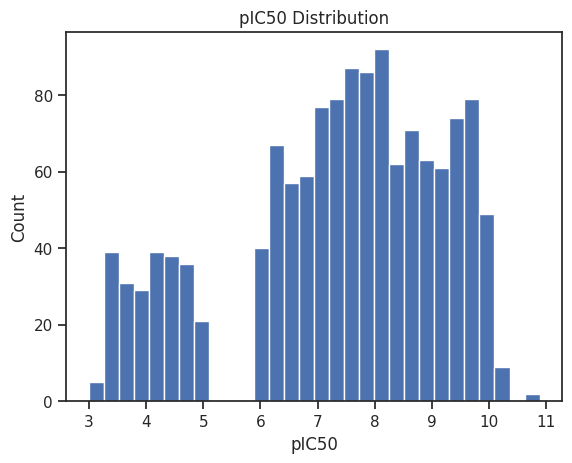

<Figure size 640x480 with 0 Axes>

In [14]:
plt.hist(df_clean["pIC50"], bins=30)
plt.xlabel("pIC50")
plt.ylabel("Count")
plt.title("pIC50 Distribution")
plt.show()
plt.savefig('histogram_pic50.pdf')

Text(0, 0.5, 'Frequency')

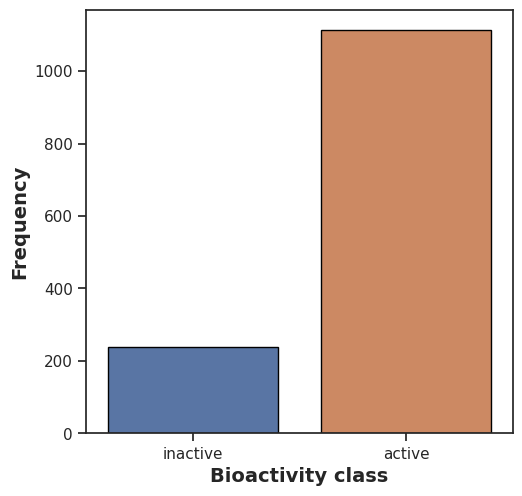

In [15]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x="bioactivity_class", data= df_clean, hue="bioactivity_class", edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')